# A2.Dimension-Reduction 无监督学习 —— 降维

降维，就是在保证数据所具有的代表性特性或者分布的情况下，将高维数据转化为低维数据的过程：

**应用领域**

     数据的可视化
     精简数据

### 聚类和降维的对比

聚类和降维都是无监督学习的典型任务，任务之间存在关联，
比如某些高维数据的聚类可以通过降维处理更好的获得，另外学界研究也表明代表性的聚类算法如k-means与降维算法如NMF之间存在等价性

### sklearn库的降维

降维是机器学习领域的一个重要研究内容，有很多被工业界和学术界接受的典型算法，截止到目前sklearn库提供7种降维算法。

降维过程也可以被理解为对数据集的组成成份进行分解（decomposition）的过程，因此sklearn为降维模块命名为decomposition,
在对降维算法调用需要使用sklearn.decomposition模块

**sklearn.decomposition**

![降维大致库](Pic/dmrfc.JPG)

## 降维1 PCA降维技术

简介：

主成分分析（Principal Component Analysis，PCA）是最常用的一种降维方法，
通常用于高维数据集的探索与可视化，还可以用作数据压缩和预处理等。

PCA可以把具有相关性的高维变量合成为线性无关的低维变量，称为主成分。
主成分能够尽可能保留原始数据的信息。

主成分分析

在介绍PCA的原理之前需要回顾涉及到的相关术语：

    • 方差
    • 协方差
    • 协方差矩阵
    • 特征向量和特征值

方差：是各个样本和样本均值的差的平方和的均值，用来度量一组数据的分散程度。

协方差：用于度量两个变量之间的线性相关性程度，若两个变量的协方差为0，
则可认为二者线性无关。协方差矩阵则是由变量的协方差值构成的矩阵（对称阵）。

特征向量原理：矩阵的主成分就是其协方差矩阵对应的特征向量，按照对应的特征值大小进行排序，最大的特征值就是第一主成分，其次是第二主成分，以此类推。

#### sklearn 成分分析

在sklearn库中，可以使用sklearn.decomposition.PCA加载PCA进行
降维，主要参数有：

n_components：指定主成分的个数，即降维后数据的维度
svd_solver ：设置特征值分解的方法，默认为'auto',其他可选有'full', 'arpack', 'randomized'。

测试数据集： 鸢尾花数据集，在sklearn的数据集包里面

1. 导入库：

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris  # 鸢尾花数据集

下面我们查看一下对应的鸢尾花数据集

![](Pic/iris.JPG)

In [8]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
x = data.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(x)
reduced_X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

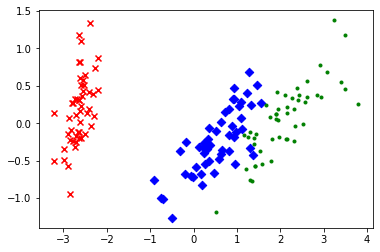

In [12]:
# 对原始数据进行降维，保存在reduced_X中
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

## NMF 非负矩阵分解

非负矩阵分解（Non-negative Matrix Factorization ，NMF）是在矩阵中所有元素均为非负数约束条件之下的矩阵分解方法。

基本思想：给定一个非负矩阵V，
NMF能够找到一个非负矩阵W和一个非负矩阵H，
使得矩阵W和H的乘积近似等于矩阵V中的值。

![](Pic/NMF.JPG)

W矩阵：基础图像矩阵，相当于从原矩阵V中抽取出来的特征

H矩阵：系数矩阵。

• NMF能够广泛应用于图像分析、文本挖掘和语音处理等领域。

![](Pic/NMFTrix.JPG)

公式推导：
[https://blog.csdn.net/acdreamers/article/details/44663421/](https://blog.csdn.net/acdreamers/article/details/44663421/)

#### sklearn 中的NMF

在sklearn库中，可以使用sklearn.decomposition.NMF加载NMF算法，主要参数有：

    • n_components：用于指定分解后矩阵的单个维度k；
    • init：W矩阵和H矩阵的初始化方式，默认为‘nndsvdar’。

测试实验：NMF 人脸特征提取技术

数据集：sklearn.dataset中的Olivetti人脸数据集

目标：已知Olivetti人脸数据共400个，每个数据是64*64大小。
由于NMF分解得到的W矩阵相当于从原始矩阵中提取的特征，
那么就可以使用NMF对400个人脸数据进行特征提取。

1.导入库

In [14]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition

2.设置基本参数并加载数据

In [12]:
n_row, n_col = 3, 4    # 设置图像展示时的排列情况，3行4列
n_components = n_row * n_col # 设置提取的特征的数目 3x4=12条 特征数据
image_shape = (64, 64)  # 设置人脸数据图片的大小

datasets = fetch_olivetti_faces(shuffle=True,
random_state=RandomState(0))
faces = datasets.data  # 加载数据，并打乱顺序
faces

array([[0.6694215 , 0.6363636 , 0.6487603 , ..., 0.08677686, 0.08264463,
        0.07438017],
       [0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
        0.6528926 ],
       [0.37190083, 0.34710744, 0.3677686 , ..., 0.7066116 , 0.6818182 ,
        0.5495868 ],
       ...,
       [0.55785125, 0.60330576, 0.6570248 , ..., 0.17768595, 0.20661157,
        0.19421488],
       [0.5206612 , 0.5206612 , 0.53305787, ..., 0.46694216, 0.43801653,
        0.43801653],
       [0.3966942 , 0.3677686 , 0.3429752 , ..., 0.37190083, 0.26859504,
        0.29752067]], dtype=float32)

编写plt的图表设计函数

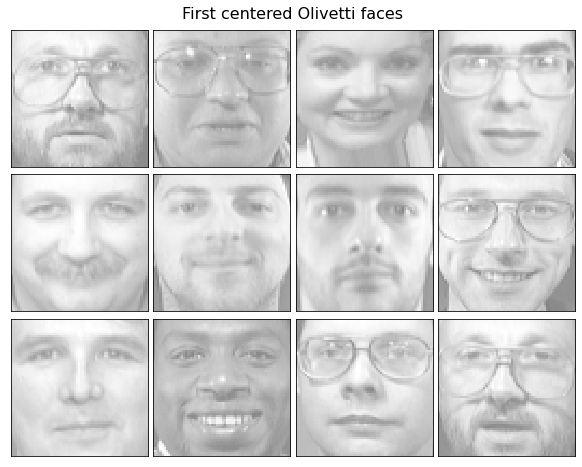

In [13]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)

    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())

        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.94, 0.04, 0.)


plot_gallery("First centered Olivetti faces", faces[:n_components])

